In [3]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import os
from PIL import Image
import numpy as np

In [4]:
def get_data_set(filepath):
    imgs=[]
    labels=[]
    print('Start reading files...')
    for f in os.listdir(filepath):
        if not (f.endswith('pgm')):
            labels.append(f.split('.')[0])
            print('Reading fle :'+f)
            img=np.asarray(Image.open(filepath+f))
            imgs.append(img)
    print('Reading files finished')
    return np.asarray(imgs),labels

In [5]:
filepath=("/yalefaces/")
imgs,labels = get_data_set(filepath)   

Start reading files...
Reading fle :subject01.centerlight
Reading fle :subject01.glasses
Reading fle :subject01.happy
Reading fle :subject01.leftlight
Reading fle :subject01.noglasses
Reading fle :subject01.normal
Reading fle :subject01.rightlight
Reading fle :subject01.sad
Reading fle :subject01.sleepy
Reading fle :subject01.surprised
Reading fle :subject01.wink
Reading fle :subject02.centerlight
Reading fle :subject02.glasses
Reading fle :subject02.happy
Reading fle :subject02.leftlight
Reading fle :subject02.noglasses
Reading fle :subject02.normal
Reading fle :subject02.rightlight
Reading fle :subject02.sad
Reading fle :subject02.sleepy
Reading fle :subject02.surprised
Reading fle :subject02.wink
Reading fle :subject03.centerlight
Reading fle :subject03.glasses
Reading fle :subject03.happy
Reading fle :subject03.leftlight
Reading fle :subject03.noglasses
Reading fle :subject03.normal
Reading fle :subject03.rightlight
Reading fle :subject03.sad
Reading fle :subject03.sleepy
Reading f

In [38]:
labels1=[labels[i][-2:] for i in range(len(labels))]

lab=np.repeat(range(1,16),11)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imgs, lab, test_size =0.33,random_state=0)  

In [40]:
x_train1 = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test1 = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [41]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

y_train2=y_train1[:,1:]
y_test2=y_test1[:,1:]

In [17]:
classifier = Sequential()
classifier.add(Convolution2D(32, kernel_size=9, input_shape = (243, 320, 1), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (8, 8)))
classifier.add(Convolution2D(32, kernel_size=3, activation = 'relu'))
classifier.add(Convolution2D(32, kernel_size=3, activation = 'relu'))
classifier.add(Convolution2D(16, kernel_size=3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (4, 4)))


classifier.add(Flatten())

classifier.add(Dense( activation = 'relu',units = 248))
classifier.add(Dense( activation = 'relu',units = 128))
classifier.add(Dense(activation = 'softmax',units=15))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [15]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 235, 312, 32)      2624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 37, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 35, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 33, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 8, 16)         0         
 2D)                                                  

In [18]:
classifier.fit(x_train1, y_train2, validation_data=(x_test1, y_test2), epochs=20,batch_size=32)

Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 8.9864 - accuracy: 0.0636 - val_loss: 3.5795 - val_accuracy: 0.1818
Epoch 2/50
4/4 [==============================] - 11s 3s/step - loss: 2.9358 - accuracy: 0.1273 - val_loss: 2.5002 - val_accuracy: 0.2727
Epoch 3/50
4/4 [==============================] - 8s 2s/step - loss: 2.2101 - accuracy: 0.2727 - val_loss: 2.3581 - val_accuracy: 0.3455
Epoch 4/50
4/4 [==============================] - 14s 3s/step - loss: 1.8548 - accuracy: 0.4545 - val_loss: 1.9224 - val_accuracy: 0.4545
Epoch 5/50
4/4 [==============================] - 11s 3s/step - loss: 1.4197 - accuracy: 0.6091 - val_loss: 1.5125 - val_accuracy: 0.6182
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.9046 - accuracy: 0.7909 - val_loss: 0.9934 - val_accuracy: 0.7091
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 0.6075 - accuracy: 0.8182 - val_loss: 0.5029 - val_accuracy: 0.8182
Epoch 8/50
4/4 [======================

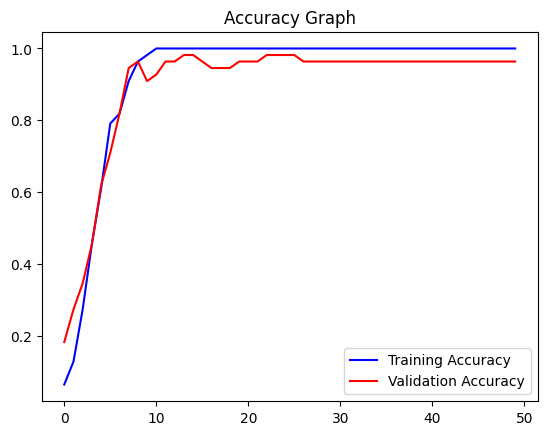

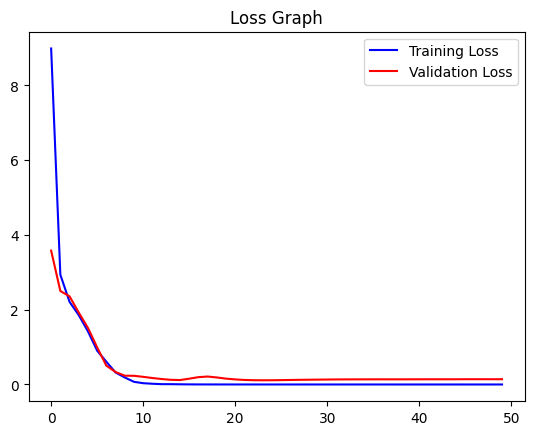

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [42]:
pred=classifier.predict(x_test1)

valeur_max=[]
index_max=[]
for i in range(55):
    val=max(pred[i])
    valeur_max.append(val)
    indx=np.argmax(pred[i])
    index_max.append(indx+1)

pred_New=(np.array(index_max)).reshape(-1,1)
y_test=y_test.reshape(-1,1)


2/2 [==============================] - 1s 222ms/step


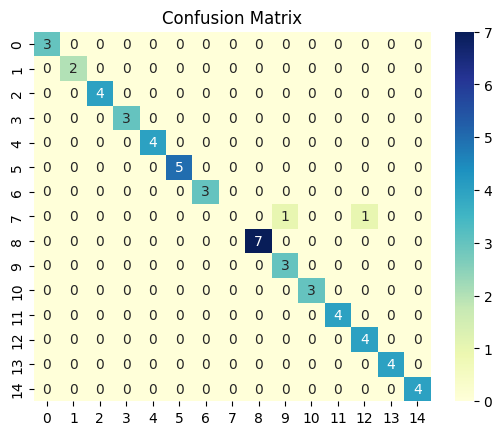

In [46]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, pred_New)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.title('Confusion Matrix')

CM1=pd.DataFrame(CM)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")


In [ ]:
### only 2 images were predict in wrong way for class 9 and class 12